## Import Data

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
from elasticsearch import Elasticsearch

In [2]:
es=Elasticsearch(
    ['http://pscs-pum17.sub10301912440.csdemo.oraclevcn.com'],
    http_auth=('esadmin', 'Esadmin1'),
    scheme='http',
    port=9200)

res = es.search(index="psd_course_catalog_cs2hq2", body={"size":10000, "query": {"match_all": {}}}, headers={"SearchUser":"PS"})

In [3]:
df = pd.DataFrame(columns=["ID", "Title", "Descr"])

In [4]:
courses = []
for hit in res['hits']['hits']:
    src = hit["_source"]
    courses.append([src['CRSE_ID_ORCL_ES_ENG'], src['DESCR_ORCL_ES_ENG'], src['DESCRLONG_ORCL_ES_ENG']])    

In [5]:
df = pd.DataFrame(data=courses, columns=['id', 'title', 'description'])

In [6]:
df.head()

,id,title,description
0,000042,Data Organisation,This course examines data organisation.
1,000044,Special Topic in Ethnomusic,Special Topic in Ethnomusicology
2,000050,Electronics 1,This course examines electronic concepts and t...
3,000059,Software Engineering,This course explains the concepts of software ...
4,000150,Debates in Social Policy,Debates in Social Policy - First Year Sociol...


## Review & Clean Data

In [7]:
import pandas as pd
import seaborn as sns 
%matplotlib inline

In [8]:
df.describe()

,id,title,description
count,2868,2868,2868
unique,2868,2726,1180
top,666979,Statistics,
freq,1,5,1676


In [9]:
df.dtypes

id             object
title          object
description    object
dtype: object

In [10]:
for (name, data) in df.iteritems():
    df[name] = df[name].astype(str)

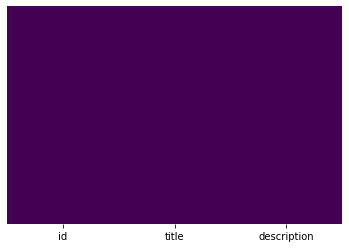

In [11]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

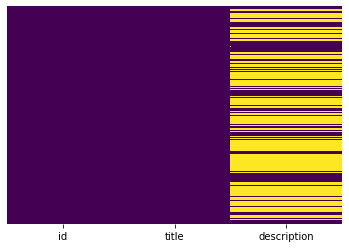

In [12]:
sns.heatmap(df.applymap(lambda x: x == ''),yticklabels=False,cbar=False,cmap='viridis')

In [13]:
df['description'].replace('', np.nan, inplace=True)
df.dropna(inplace=True)

In [14]:
df.head()

,id,title,description
0,000042,Data Organisation,This course examines data organisation.
1,000044,Special Topic in Ethnomusic,Special Topic in Ethnomusicology
2,000050,Electronics 1,This course examines electronic concepts and t...
3,000059,Software Engineering,This course explains the concepts of software ...
4,000150,Debates in Social Policy,Debates in Social Policy - First Year Sociol...


## Extract Keywords

In [15]:
from rake_nltk import Rake
import nltk

In [16]:
def extract_phrases(text, r):
    r.extract_keywords_from_text(text)
    return r.get_ranked_phrases()

r = Rake()
df['keywords'] = df['description'].apply(lambda x : extract_phrases(x, r))

In [17]:
df.head(n=20)

,id,title,description,keywords
0,000042,Data Organisation,This course examines data organisation.,[course examines data organisation]
1,000044,Special Topic in Ethnomusic,Special Topic in Ethnomusicology,"[special topic, ethnomusicology]"
2,000050,Electronics 1,This course examines electronic concepts and t...,"[course examines electronic concepts, theory]"
3,000059,Software Engineering,This course explains the concepts of software ...,"[software engineering, course explains, concepts]"
4,000150,Debates in Social Policy,Debates in Social Policy - First Year Sociol...,"[first year sociology subject, social policy, ..."
5,000167,Sociology of work,Sociology of work - Second Year Sociology Sub...,"[second year sociology subject, sociology, work]"
6,000170,Social Change & Modernisation,Social Change and Modernisation - Second Year...,"[second year sociology subject, social change,..."
7,000098,Human Behaviour 1B,Human Behaviour 1B - Second Year Social Work S...,"[second year social work subject, human behavi..."
8,000105,Real Time Instrumentation,This course teaches the concepts of real time ...,"[real time instrumentation, course teaches, co..."
9,000077,Industrial Training,This course examines the theory of industrial ...,"[industrial training, course examines, theory]"


In [18]:
# Libraries for text preprocessing
import re
import nltk
from nltk.corpus import stopwords

In [19]:
keywords = []
for k in df['keywords']:
    for j in k:
        keywords.extend(j.split(' '))

freq = pd.Series(keywords).value_counts()[:10]
freq.keys()

Index(['course', 'module', '2', 'year', 'theory', 'social', 'teaches', 'work',
       'subject', 'concepts'],
      dtype='object')

In [20]:
stop_words = set(stopwords.words("english"))
new_words = ["course", "teaches", "special", "module", "year", "subject", "work", "examination", "explain", "examine", "concept", "first", "teach", "second", "third", "towards", "aim", "thesis", "examines", "explains", "aimed", "theory", "concepts", "contemporary", "students", "study", "analysis", "introduction", "understanding", "learning", "outcomes", "credits", "outline", "assessment", "arts", "2", "provides", "convener", "description", "able", "principles", "1", "prerequisites", "lecture", "times", "aims", "bachelor", "many", "worth", "3", "development", "cover", "dp", "requirements", "successful", "completion", "15", "tba", "range", "masters", "introduce", "june", "issues", "assessed", "use", "24", "lectures", "evaluate", "non", "coursework", "role", "12", "heqf", "well", "completion", "8", "focus", "class", "tests", "introduces", "application", "project", "practice", "3", "hours", "required", "context", "research", "analyse", "16", "applications", "emphasis", "relation", "writing", "november", "demonstrate", "theories", "semester", "identify", "exams", "consider", "look", "relationship", "knowledge", "introduced", "opportunity", "explore", "36", "lectures", "2", "practicals", "paper", "historical", "fundamental", "topic",  "arg", "time", "50", "practicals", "student", "part", "4", "one", "tutorials", "methods", "two", "areas", "critically", "problems", "texts", "written", "selection", "mark", "practical", "assess", "skills", "per", "week", "develop", "experience", "also", "translation", "variety", "discuss", "period", "provide", "basic", "review", "techniques", "assignments", "ability", "topics", "fourth", "evaluation", "covers", "case", "elements", "questions", "way", "post", "l2s4", "things", "critical", "economic", "psychological", "theoretical", "3rd", "specific", "discussion", "personal", "e", "preparation", "5", "hour", "performance", "interest", "key", "developing", "self", "process", "l2s3", "prerequisite", "area", "employment", "impact", "1b"]
stop_words = stop_words.union(new_words)

In [21]:
r = Rake(stopwords = stop_words)

In [22]:
df['keywords'] = df['description'].apply(lambda x : extract_phrases(x, r))

In [23]:
df.head()

,id,title,description,keywords
0,000042,Data Organisation,This course examines data organisation.,[data organisation]
1,000044,Special Topic in Ethnomusic,Special Topic in Ethnomusicology,[ethnomusicology]
2,000050,Electronics 1,This course examines electronic concepts and t...,[electronic]
3,000059,Software Engineering,This course explains the concepts of software ...,[software engineering]
4,000150,Debates in Social Policy,Debates in Social Policy - First Year Sociol...,"[social policy, sociology, debates]"


## Build Word Cloud

In [24]:
# build text corpus
corpus = []
for i, row in df.iterrows():
    text = row['keywords']
    for word in row['keywords']:
        corpus.append(word)

print(corpus)

['data organisation', 'ethnomusicology', 'electronic', 'software engineering', 'social policy', 'sociology', 'debates', 'sociology', 'social change', 'sociology', 'modernisation', 'human behaviour', 'social', 'real', 'instrumentation', 'industrial training', 'video signal processing', 'television', 'advanced control', 'digital image processing systems', 'themes', 'socology', 'sociology', 'state', 'sociology', 'law', 'inequality', 'social', 'managing people', 'communication systems', 'electronics', 'industrial training', 'social', 'optical devices', 'microwave', 'integrated circuit technology', 'social', 'community', 'social developement', 'social', 'policy', 'planning', 'human resource management', 'legal', 'social', 'law', 'legal', 'laws', 'conflict', 'linear programming', 'linear equations', 'systems', 'probability', 'modeling', 'matrices', 'mathematics', 'functions', 'finance', 'combinatorics', 'algebra', 'remedial algebra', 'sociology', 'sociological', 'advanced', '20th cntury', 's

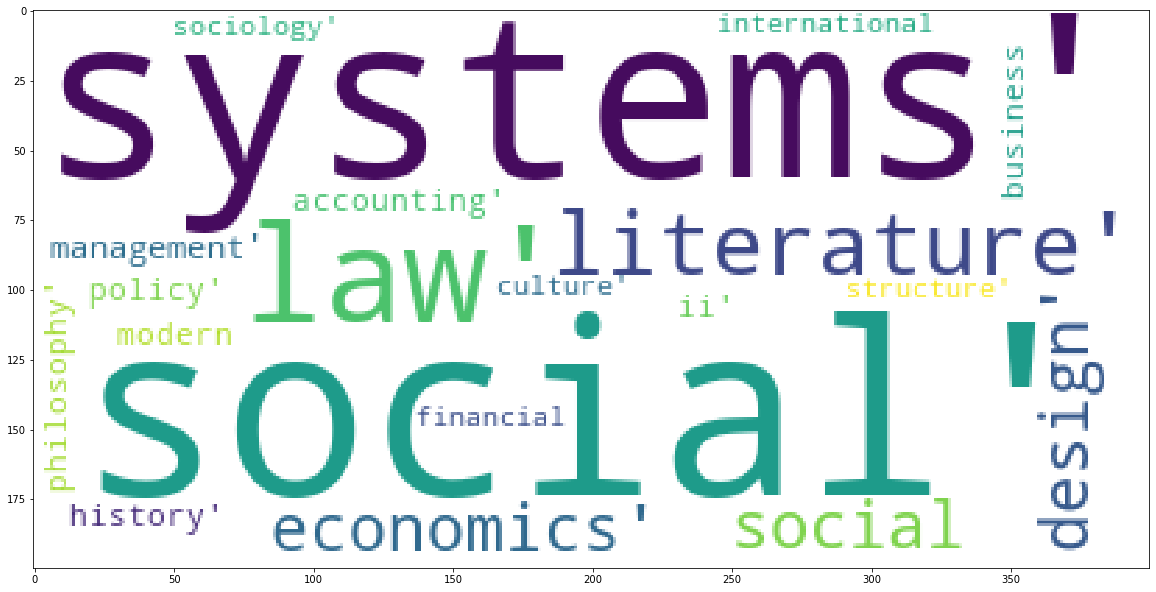

In [29]:
# Word Cloud
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

wordcloud = WordCloud(
    background_color='white',
    max_words=20,
    random_state=42).generate(str(corpus))

fig = plt.figure(1, figsize=(20, 30))
plt.imshow(wordcloud)